<a href="https://colab.research.google.com/github/Parsayarya/titanic-dataset/blob/main/TitanicEx0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv ('/content/DataSetT.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Set cleaning and trimming**

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import matplotlib.pyplot as plt


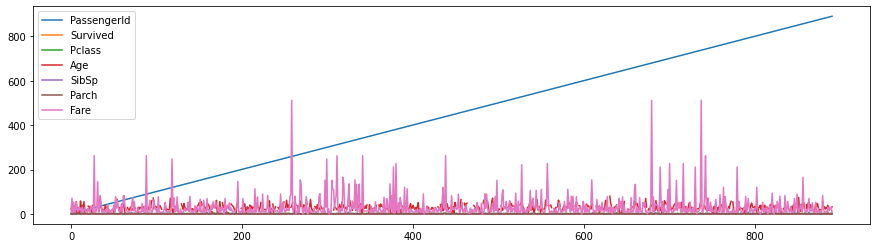

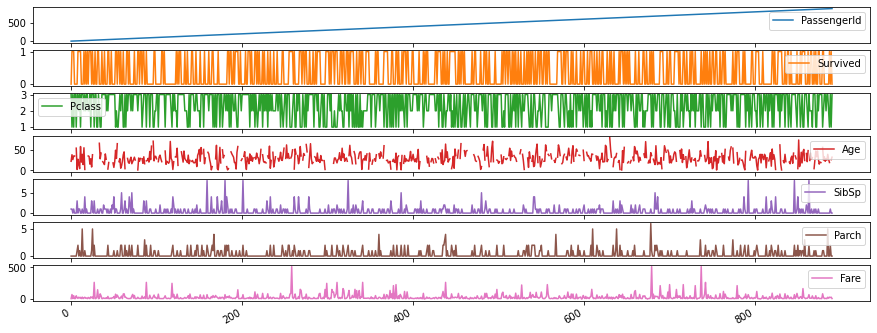

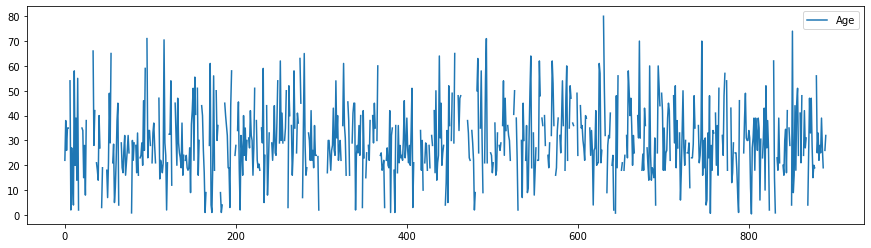

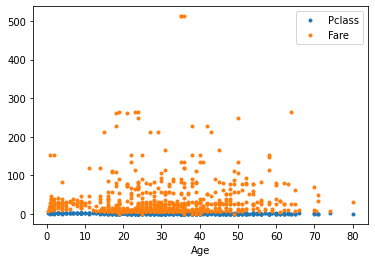

In [ ]:
df.plot(figsize=(15,4))
df.plot(subplots=True, figsize=(15,6))
df.plot(y=["Age", "Sex"], figsize=(15,4))
df.plot(x="Age", y=["Pclass", "Fare"], style='.')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import seaborn as sns

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]] 
df["Embarked"] = [0 if i == "S" else i for i in df["Embarked"]] 
df["Embarked"] = [1 if i == "C" else i for i in df["Embarked"]] 
df["Embarked"] = [2 if i == "Q" else i for i in df["Embarked"]] 

**correlation and heat map**

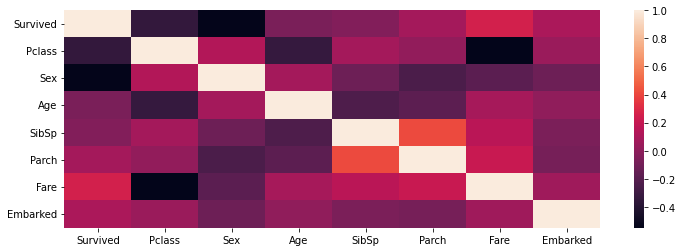

In [ ]:
fig,ax = plt.subplots(figsize=(12,4))
columns = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
df1 = df[columns].corr()
sns.heatmap(df1)

In [ ]:
# df.head()
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961


**box plot**

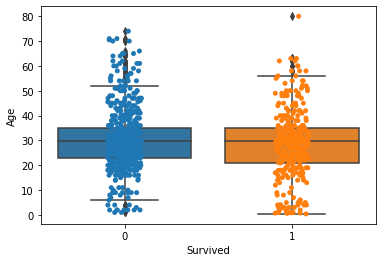

In [ ]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=df)
ax = sns.stripplot(x="Survived", y="Age",
                   data=df, jitter=True,
                   edgecolor="gray")

 **New features to add**

In [ ]:
#age and class
df["AC"] = df['Age'] * df["Pclass"]
#sibsp = number of sibbilings or spouses, parched = number of children or parents -> new feature:companian
df['Companians'] = df['SibSp'] + df['Parch']
df.loc[df['Companians'] > 0, 'not_alone'] = 0
df.loc[df['Companians'] == 0, 'not_alone'] = 1
df['not_alone'] = df['not_alone'].astype(int)
# df['not_alone'].value_counts()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AC,Companians,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,0,66.000000,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,38.000000,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,0,78.000000,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0,35.000000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,0,105.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,0,54.000000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0,19.000000,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,0,89.097353,3,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1,26.000000,0,1


In [ ]:
#dropping columns that are not important
#df = df.drop(columns=["PassengerId"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AC,Companians,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,0,66.000000,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,38.000000,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,0,78.000000,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0,35.000000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,0,105.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,0,54.000000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0,19.000000,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,0,89.097353,3,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1,26.000000,0,1


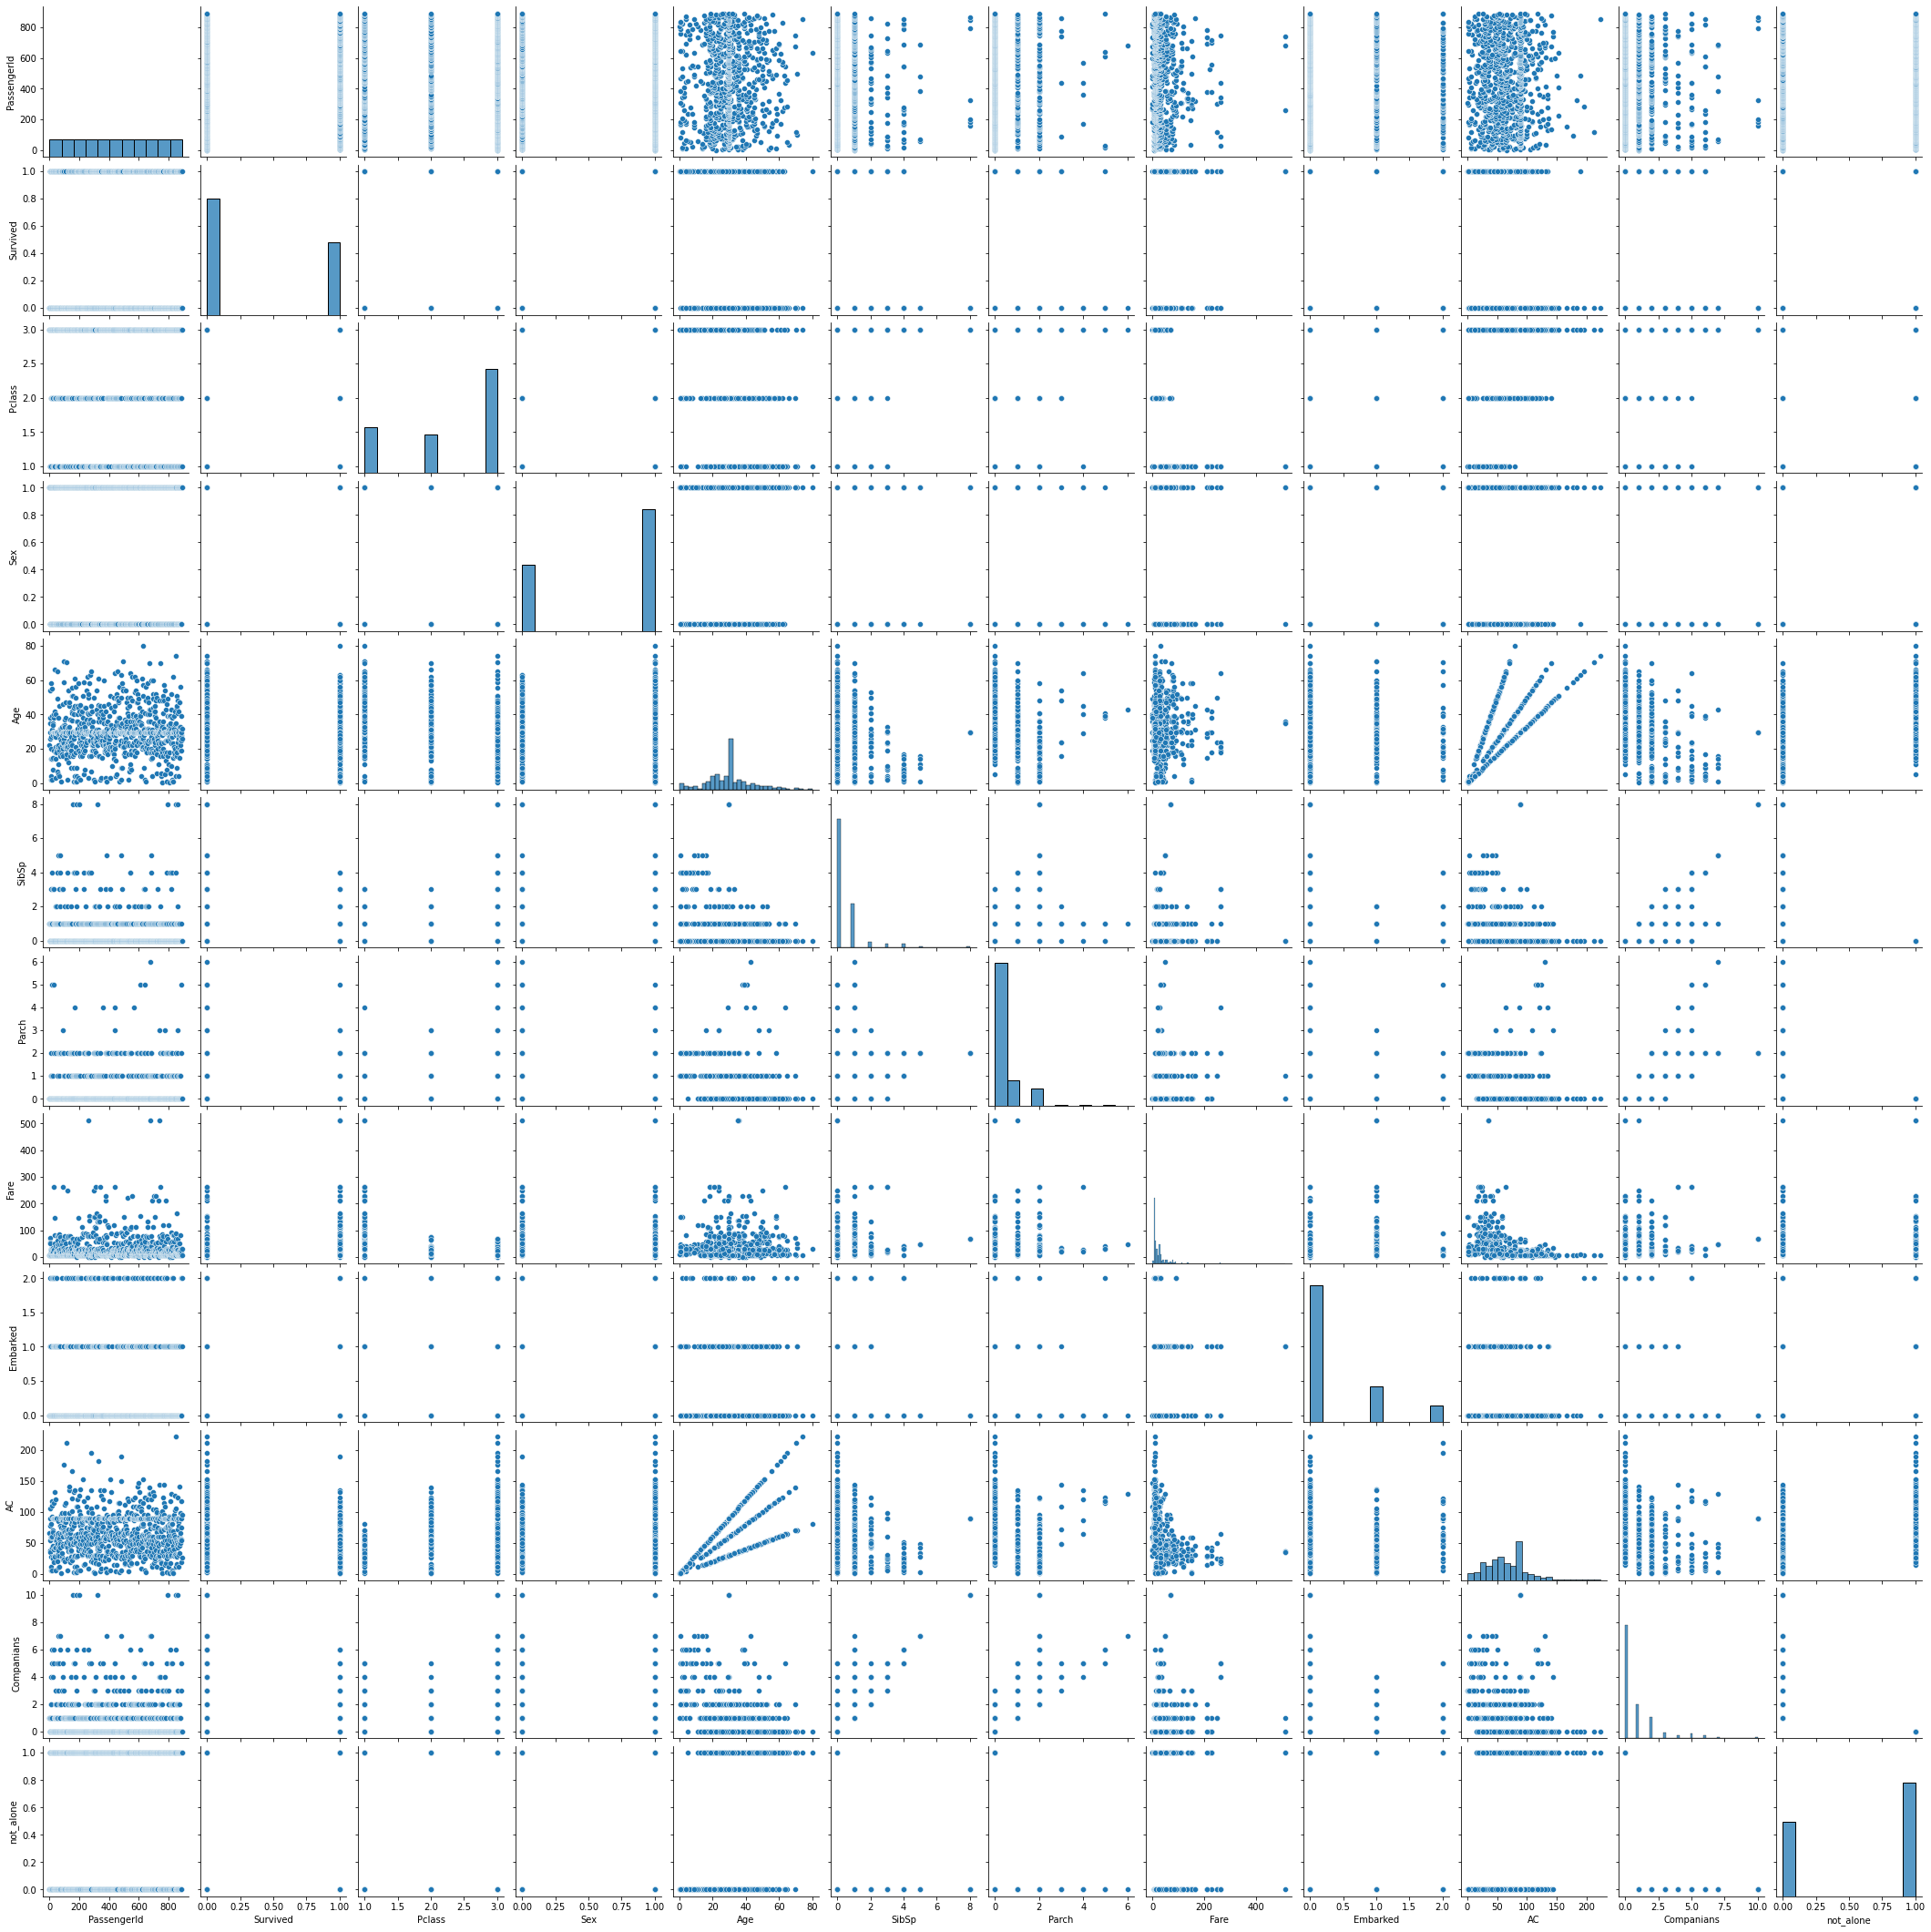

In [ ]:
sns.pairplot(df)

**questions**

In [ ]:
print(df.groupby('Sex').Survived.mean(),'\n\n\n',"1 is male,0 is female")

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64 


 1 is male,0 is female


In [ ]:
df.groupby('Pclass').Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [ ]:
df2 = df[df["Age"]<30]
df2 = df2[df2["Age"]>20]
df2.Survived.sum()/df.Survived.sum()

0.3684210526315789

**survived** -> label not a feature

In [ ]:
X = df.loc[:, df.columns != 'Survived']
y = df['Survived']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
# df = df.drop(columns=("PassengerId","Name","SibSp","Parch","Ticket","Cabin"))
print(df)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20)

     PassengerId  Survived  Pclass  ...          AC  Companians  not_alone
0              1         0       3  ...   66.000000           1          0
1              2         1       1  ...   38.000000           1          0
2              3         1       3  ...   78.000000           0          1
3              4         1       1  ...   35.000000           1          0
4              5         0       3  ...  105.000000           0          1
..           ...       ...     ...  ...         ...         ...        ...
886          887         0       2  ...   54.000000           0          1
887          888         1       1  ...   19.000000           0          1
888          889         0       3  ...   89.097353           3          0
889          890         1       1  ...   26.000000           0          1
890          891         0       3  ...   96.000000           0          1

[891 rows x 15 columns]


Standardizing:
the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

Data normalization consists of remodeling numeric columns to a standard scale. In Python, we will implement data normalization in a very simple way. The Pandas library contains multiple built-in methods for calculating the foremost common descriptive statistical functions which make data normalization techniques very easy to implement.

normalize fare & age

In [ ]:
from sklearn import preprocessing
df['_Fare'] = preprocessing.scale(df[['Fare']]) [:,0]
df["age_normalized"] = (df["Age"] - df["Age"].min())/(df["Age"].max()-df["Age"].min())
df["age_standardized"] = (df["Age"] - df["Age"].mean())/df["Age"].std()
df = df.drop(columns=['PassengerId','Name','SibSp',"Parch","Ticket","Cabin"])


KeyError: ignored

In [ ]:
X_train['Fare'] = preprocessing.scale(X_train[['Fare']]) [:,0]
X_train["age_standardized"] = (X_train["Age"] - X_train["Age"].mean())/X_train["Age"].std()
X_test['Fare'] = preprocessing.scale(X_test[['Fare']]) [:,0]
X_test["age_standardized"] = (X_test["Age"] - X_test["Age"].mean())/X_test["Age"].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import NuSVC
# model = SGDClassifier()
model = NuSVC()


In [ ]:
X_train = X_train.drop(columns=['PassengerId','Name','SibSp',"Parch","Ticket","Cabin"])
X_test = X_test.drop(columns=['PassengerId','Name','SibSp',"Parch","Ticket","Cabin"])

In [ ]:
def avgl(lst):
    return sum(lst) / len(lst)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(7)
precision = []
f_score = []
recall = []
accuracy = []
for train_index , val_index in skfolds.split(X_train , y_train):

  model.fit(X_train.iloc[train_index] , y_train.iloc[train_index])
  y_prd = model.predict(X_train.iloc[val_index])
  f = f1_score(y_train.iloc[val_index] , y_prd)
  p = precision_score(y_train.iloc[val_index] , y_prd)
  r = recall_score(y_train.iloc[val_index] ,y_prd )
  a = accuracy_score(y_train.iloc[val_index], y_prd)
  precision.append(p)
  f_score.append(f)
  recall.append(r)
  accuracy.append(a)
print(avgl(precision),"\t",avgl(f_score),"\t",avgl(recall),"\t",avgl(accuracy),"\t")

0.7948159844254035 	 0.747442269339924 	 0.7075380759591287 	 0.818814654574701 	


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_mx = []
skfolds = StratifiedKFold(7)
for train_index , val_index in skfolds.split(X_train , y_train):
  model.fit(X_train.iloc[train_index] , y_train.iloc[train_index])
  y_prd = model.predict(X_train.iloc[val_index])
  cnf = confusion_matrix(y_train.iloc[val_index] , y_prd)
  cnf_mx.append(cnf)

cnf_mx = np.array(cnf_mx)
row_sum = cnf_mx.sum(axis = 1 , keepdims = True)
norm_cnf_mx = cnf_mx / row_sum
norm_cnf_mx = norm_cnf_mx.reshape(7,4)
k= 4*[0]
print(norm_cnf_mx[0])
for i in range(7):
  k = k + norm_cnf_mx[i]
print(k)
k = k/7
print(row_sum)
k.reshape(2,2)
print(k)

[0.84931507 0.06896552 0.15068493 0.93103448]
[5.82941795 1.43628811 1.17058205 5.56371189]
[[[73 29]]

 [[67 35]]

 [[64 38]]

 [[67 35]]

 [[69 33]]

 [[67 34]]

 [[64 37]]]
[0.83277399 0.20518402 0.16722601 0.79481598]


[[0.83277399 0.20518402]
 [0.16722601 0.79481598]]
TP: 0.8327739929743777 	 TN: 0.2051840155745965 	 FP: 0.16722600702562235 	 FN: 0.7948159844254035


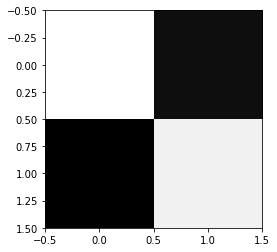

In [ ]:

k = k.reshape(2,2)
print(k)
plt.imshow(k , cmap= plt.cm.gray)
print("TP:",k[0][0],"\t","TN:",k[0][1],"\t","FP:",k[1][0],"\t","FN:",k[1][1])